In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from PIL import Image

In [6]:
base_path = r'c:\Users\USER\Desktop\Git\sci\SCI\데이터\Table'
table_1 = pd.read_csv(f'{base_path}\\table_1.csv')
table_2 = pd.read_csv(f'{base_path}\\table_2.csv')
table_3 = pd.read_csv(f'{base_path}\\table_3.csv')

table_merge = pd.merge(table_1, table_3, how='left', on='aid')
table_merge = pd.merge(table_merge, table_2, how='left', on='did')

table_merge['gu'] = table_merge['location'].str.split().str[1]
table_merge['dong'] = table_merge['location'].str.split().str[2]

In [8]:
table_merge

,aid,location,name,lat,lng,year_built,education,household,parking,complex_facility,...,subway_distance,convenience_facility,did,price,year,month,call_rate,m2,gu,dong
0,0,서울특별시 강남구 개포동 개포로 311,"우성9차아파트901동,902동",37.484802,127.057178,1991,3,233,1,0,...,4,6,0,67000.0,2006,1,3.740,1027697.4,강남구,개포동
1,0,서울특별시 강남구 개포동 개포로 311,"우성9차아파트901동,902동",37.484802,127.057178,1991,3,233,1,0,...,4,6,1,66000.0,2006,2,3.920,1034711.9,강남구,개포동
2,0,서울특별시 강남구 개포동 개포로 311,"우성9차아파트901동,902동",37.484802,127.057178,1991,3,233,1,0,...,4,6,2,73875.0,2006,3,3.970,1042293.6,강남구,개포동
3,0,서울특별시 강남구 개포동 개포로 311,"우성9차아파트901동,902동",37.484802,127.057178,1991,3,233,1,0,...,4,6,3,83000.0,2006,4,3.970,1048598.6,강남구,개포동
4,0,서울특별시 강남구 개포동 개포로 311,"우성9차아파트901동,902동",37.484802,127.057178,1991,3,233,1,0,...,4,6,4,85000.0,2006,5,3.960,1055855.4,강남구,개포동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60364,704,서울특별시 중랑구 신내동 용마산로125길 50,벽산,37.603174,127.100019,2000,2,284,1,0,...,15,4,204,60000.0,2023,1,3.269,3795362.3,중랑구,신내동
60365,704,서울특별시 중랑구 신내동 용마산로125길 50,벽산,37.603174,127.100019,2000,2,284,1,0,...,15,4,205,57000.0,2023,2,3.425,3806664.6,중랑구,신내동
60366,704,서울특별시 중랑구 신내동 용마산로125길 50,벽산,37.603174,127.100019,2000,2,284,1,0,...,15,4,210,59900.0,2023,7,3.510,3822036.6,중랑구,신내동
60367,704,서울특별시 중랑구 신내동 용마산로125길 50,벽산,37.603174,127.100019,2000,2,284,1,0,...,15,4,211,58000.0,2023,8,3.538,3830916.9,중랑구,신내동


## 아파트 단지 데이터 기술통계 분석

In [9]:
# table_merge 데이터 기본 정보 확인
print("=== table_merge 데이터 기본 정보 ===")
print(f"Shape: {table_merge.shape}")
print(f"\nColumns: {table_merge.columns.tolist()}")
print(f"\nData types:")
print(table_merge.dtypes)
print(f"\n결측값 확인:")
print(table_merge.isnull().sum())

=== table_merge 데이터 기본 정보 ===
Shape: (60369, 21)

Columns: ['aid', 'location', 'name', 'lat', 'lng', 'year_built', 'education', 'household', 'parking', 'complex_facility', 'move_in_day', 'subway_distance', 'convenience_facility', 'did', 'price', 'year', 'month', 'call_rate', 'm2', 'gu', 'dong']

Data types:
aid                       int64
location                 object
name                     object
lat                     float64
lng                     float64
year_built                int64
education                 int64
household                 int64
parking                   int64
complex_facility          int64
move_in_day               int64
subway_distance           int64
convenience_facility      int64
did                       int64
price                   float64
year                      int64
month                     int64
call_rate               float64
m2                      float64
gu                       object
dong                     object
dtype: object

결측값 

In [10]:
# 수치형 변수만 선택
numeric_columns = table_merge.select_dtypes(include=[np.number]).columns.tolist()
print(f"\n수치형 변수들: {numeric_columns}")

# 수치형 데이터만으로 새로운 데이터프레임 생성
numeric_data = table_merge[numeric_columns].copy()
print(f"\n수치형 데이터 shape: {numeric_data.shape}")


수치형 변수들: ['aid', 'lat', 'lng', 'year_built', 'education', 'household', 'parking', 'complex_facility', 'move_in_day', 'subway_distance', 'convenience_facility', 'did', 'price', 'year', 'month', 'call_rate', 'm2']

수치형 데이터 shape: (60369, 17)


In [11]:
# 기술통계량 계산 함수
def calculate_detailed_stats(data, column_name):
    stats = {
        'Variable': column_name,
        'Count': data[column_name].count(),
        'Mean': data[column_name].mean(),
        'Std': data[column_name].std(),
        'Min': data[column_name].min(),
        'Q1': data[column_name].quantile(0.25),
        'Median': data[column_name].median(),
        'Q3': data[column_name].quantile(0.75),
        'Max': data[column_name].max(),
        'Missing': data[column_name].isnull().sum()
    }
    return stats

# 모든 수치형 변수에 대한 기술통계 계산
stats_list = []
for col in numeric_columns:
    stats = calculate_detailed_stats(numeric_data, col)
    stats_list.append(stats)

# 데이터프레임으로 변환
stats_df = pd.DataFrame(stats_list)
print("\n=== 수치형 변수 기술통계량 ===")
print(stats_df.round(2))


=== 수치형 변수 기술통계량 ===
                Variable  Count        Mean        Std         Min  \
0                    aid  60369      362.26     198.83        0.00   
1                    lat  60369       37.55       0.05       37.45   
2                    lng  60369      126.99       0.08      126.82   
3             year_built  60369     1998.55       7.71     1971.00   
4              education  60369        4.50       1.79        1.00   
5              household  60369      947.02    1009.25       12.00   
6                parking  60369        1.09       0.67        0.00   
7       complex_facility  60369        2.94       2.98        0.00   
8            move_in_day  60369     8810.06    2820.75     1583.00   
9        subway_distance  60369        7.86       3.53        1.00   
10  convenience_facility  60369        4.37       1.90        1.00   
11                   did  60369      102.93      56.00        0.00   
12                 price  60369    66174.48   40244.86     1000.00  

In [12]:
# Table 1 (아파트 단지 데이터) 변수들 확인
print("\n=== Table 1 (아파트 단지 데이터) 수치형 변수 분석 ===")
table1_numeric = table_1.select_dtypes(include=[np.number]).columns.tolist()
print(f"Table 1 수치형 변수들: {table1_numeric}")

# Table 1 기술통계
table1_stats = []
for col in table1_numeric:
    if col in table_1.columns:
        stats = calculate_detailed_stats(table_1, col)
        stats_list.append(stats)
        table1_stats.append(stats)

if table1_stats:
    table1_stats_df = pd.DataFrame(table1_stats)
    print("\nTable 1 기술통계량:")
    print(table1_stats_df.round(2))
else:
    print("Table 1에 수치형 변수가 없습니다.")


=== Table 1 (아파트 단지 데이터) 수치형 변수 분석 ===
Table 1 수치형 변수들: ['aid', 'lat', 'lng', 'year_built', 'education', 'household', 'parking', 'complex_facility', 'move_in_day', 'subway_distance', 'convenience_facility']

Table 1 기술통계량:
                Variable  Count     Mean      Std      Min       Q1   Median  \
0                    aid    705   352.00   203.66     0.00   176.00   352.00   
1                    lat    705    37.55     0.05    37.45    37.50    37.53   
2                    lng    705   126.99     0.08   126.82   126.91   127.02   
3             year_built    705  1999.25     7.64  1971.00  1996.00  2000.00   
4              education    705     4.42     1.81     1.00     3.00     4.00   
5              household    705   671.64   803.61    12.00   198.00   417.00   
6                parking    705     1.17     1.13     0.00     1.00     1.00   
7       complex_facility    705     2.20     2.79     0.00     0.00     0.00   
8            move_in_day    705  8525.91  2801.92  1583.

In [14]:
# 아파트 단지 데이터 (Table 1)에서 연구 변수들을 정확히 매핑
variable_mapping = {
    'year_built': 'a_y (Year built)',
    'education': 'a_e (Number of education facilities)', 
    'household': 'a_h (Number of households)',
    'parking': 'a_p (Number of parking spaces)',
    'complex_facility': 'a_acf (Number of apartment complex facilities)',
    'move_in_day': 'a_fmi (Number of days after first move-in)',
    'subway_distance': 'a_s (Minutes to nearest subway)',
    'convenience_facility': 'a_cf (Number of adjacent convenience facilities)'
}

print("\n=== 아파트 단지 데이터 (Table 1) 수치형 변수 기술통계 ===")
print("\n연구에서 사용된 변수들:")
print("-" * 80)

# 연구 변수들에 대한 기술통계 표 생성
research_stats = []
for var_col, var_description in variable_mapping.items():
    if var_col in table_1.columns:
        stats_data = {
            'Variable': var_description,
            'Column': var_col,
            'Count': table_1[var_col].count(),
            'Mean': table_1[var_col].mean(),
            'Std': table_1[var_col].std(),
            'Min': table_1[var_col].min(),
            'Max': table_1[var_col].max(),
            'Missing': table_1[var_col].isnull().sum()
        }
        research_stats.append(stats_data)
        
        # 특별한 설명이 필요한 변수들
        if var_col == 'year_built':
            oldest_year = table_1[var_col].min()
            newest_year = table_1[var_col].max()
            avg_year = table_1[var_col].mean()
            print(f"\n{var_description}:")
            print(f"  평균 건축연도: {avg_year:.1f}년")
            print(f"  가장 오래된 연도: {oldest_year}년")
            print(f"  가장 최신 연도: {newest_year}년")
        else:
            print(f"\n{var_description}:")
            print(f"  평균: {table_1[var_col].mean():.2f}")
            print(f"  최솟값: {table_1[var_col].min():.2f}")
            print(f"  최댓값: {table_1[var_col].max():.2f}")
            print(f"  표준편차: {table_1[var_col].std():.2f}")

# 기술통계 표 데이터프레임 생성
research_stats_df = pd.DataFrame(research_stats)
print("\n\n=== 아파트 단지 데이터 기술통계 요약표 ===")
print(research_stats_df.round(2))


=== 아파트 단지 데이터 (Table 1) 수치형 변수 기술통계 ===

연구에서 사용된 변수들:
--------------------------------------------------------------------------------

a_y (Year built):
  평균 건축연도: 1999.2년
  가장 오래된 연도: 1971년
  가장 최신 연도: 2018년

a_e (Number of education facilities):
  평균: 4.42
  최솟값: 1.00
  최댓값: 10.00
  표준편차: 1.81

a_h (Number of households):
  평균: 671.64
  최솟값: 12.00
  최댓값: 6864.00
  표준편차: 803.61

a_p (Number of parking spaces):
  평균: 1.17
  최솟값: 0.00
  최댓값: 21.00
  표준편차: 1.13

a_acf (Number of apartment complex facilities):
  평균: 2.20
  최솟값: 0.00
  최댓값: 10.00
  표준편차: 2.79

a_fmi (Number of days after first move-in):
  평균: 8525.91
  최솟값: 1583.00
  최댓값: 18658.00
  표준편차: 2801.92

a_s (Minutes to nearest subway):
  평균: 7.65
  최솟값: 1.00
  최댓값: 16.00
  표준편차: 3.48

a_cf (Number of adjacent convenience facilities):
  평균: 4.30
  최솟값: 1.00
  최댓값: 11.00
  표준편차: 1.89


=== 아파트 단지 데이터 기술통계 요약표 ===
                                           Variable                Column  \
0                                  a_y

In [15]:
# 전체 table_merge 데이터에서 주요 변수들의 기술통계
print("\n\n=== 전체 데이터(table_merge)에서 주요 변수들의 기술통계 ===")
print("-" * 80)

# 주요 변수들
key_variables = ['year_built', 'education', 'household', 'parking', 'complex_facility', 
                'move_in_day', 'subway_distance', 'convenience_facility', 'price']

key_stats = []
for var in key_variables:
    if var in table_merge.columns:
        stats_data = {
            'Variable': var,
            'Count': table_merge[var].count(),
            'Mean': table_merge[var].mean(),
            'Std': table_merge[var].std(),
            'Min': table_merge[var].min(),
            'Q1': table_merge[var].quantile(0.25),
            'Median': table_merge[var].median(),
            'Q3': table_merge[var].quantile(0.75),
            'Max': table_merge[var].max()
        }
        key_stats.append(stats_data)

key_stats_df = pd.DataFrame(key_stats)
print("\n주요 변수들의 기술통계량:")
print(key_stats_df.round(2))



=== 전체 데이터(table_merge)에서 주요 변수들의 기술통계 ===
--------------------------------------------------------------------------------

주요 변수들의 기술통계량:
               Variable  Count      Mean       Std     Min       Q1   Median  \
0            year_built  60369   1998.55      7.71  1971.0   1994.0   2000.0   
1             education  60369      4.50      1.79     1.0      3.0      4.0   
2             household  60369    947.02   1009.25    12.0    313.0    609.0   
3               parking  60369      1.09      0.67     0.0      1.0      1.0   
4      complex_facility  60369      2.94      2.98     0.0      0.0      3.0   
5           move_in_day  60369   8810.06   2820.75  1583.0   6819.0   8431.0   
6       subway_distance  60369      7.86      3.53     1.0      5.0      8.0   
7  convenience_facility  60369      4.37      1.90     1.0      3.0      4.0   
8                 price  60369  66174.48  40244.86  1000.0  40500.0  54000.0   

        Q3       Max  
0   2004.0    2018.0  
1      5.0 

## 아파트 실거래가 데이터 기술통계 분석

In [ ]:
# 아파트 실거래가 데이터 (예측 대상 변수) 상세 분석
print("=" * 80)
print("아파트 실거래가 데이터 (Apartment Transaction Price Data)")
print("예측 대상 변수 (Target Variable): y_m,t")
print("=" * 80)

# price 변수 기본 정보
price_data = table_merge['price']
print(f"\n데이터 개수 (Count): {price_data.count():,}")
print(f"결측값 (Missing): {price_data.isnull().sum():,}")
print(f"데이터 타입: {price_data.dtype}")

# 기술통계량 계산
price_stats = {
    'Count': price_data.count(),
    'Mean': price_data.mean(),
    'Std': price_data.std(),
    'Min': price_data.min(),
    '25th percentile': price_data.quantile(0.25),
    'Median (50%)': price_data.median(),
    '75th percentile': price_data.quantile(0.75),
    'Max': price_data.max()
}

print("\n=== 아파트 실거래가 기술통계량 ===")
for stat_name, value in price_stats.items():
    if stat_name == 'Count':
        print(f"{stat_name:<20}: {value:,}")
    else:
        print(f"{stat_name:<20}: {value:,.2f} 만원")

# 추가 통계량
print(f"\n=== 추가 통계 정보 ===")
print(f"범위 (Range): {price_data.max() - price_data.min():,.2f} 만원")
print(f"사분위수 범위 (IQR): {price_data.quantile(0.75) - price_data.quantile(0.25):,.2f} 만원")
print(f"변동계수 (CV): {(price_data.std() / price_data.mean()) * 100:.2f}%")
print(f"왜도 (Skewness): {price_data.skew():.4f}")
print(f"첨도 (Kurtosis): {price_data.kurtosis():.4f}")

In [ ]:
# 아파트 실거래가 분포 분석
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

print("\n=== 가격 분포 분석 ===")

# 구간별 분포
price_bins = [0, 30000, 50000, 70000, 100000, 150000, float('inf')]
price_labels = ['3천만원 미만', '3-5천만원', '5-7천만원', '7억-1억원', '1-1.5억원', '1.5억원 이상']
price_binned = pd.cut(price_data, bins=price_bins, labels=price_labels, right=False)
price_distribution = price_binned.value_counts().sort_index()

print("\n가격 구간별 분포:")
for label, count in price_distribution.items():
    percentage = (count / len(price_data)) * 100
    print(f"{label:<15}: {count:,}건 ({percentage:.1f}%)")

# 히스토그램 생성
plt.figure(figsize=(12, 8))

# 서브플롯 1: 히스토그램
plt.subplot(2, 2, 1)
plt.hist(price_data, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('아파트 실거래가 분포 (Histogram)', fontsize=12, pad=20)
plt.xlabel('거래가격 (만원)', fontsize=10)
plt.ylabel('빈도', fontsize=10)
plt.grid(True, alpha=0.3)

# 서브플롯 2: 박스플롯
plt.subplot(2, 2, 2)
plt.boxplot(price_data, vert=True)
plt.title('아파트 실거래가 박스플롯 (Box Plot)', fontsize=12, pad=20)
plt.ylabel('거래가격 (만원)', fontsize=10)
plt.grid(True, alpha=0.3)

# 서브플롯 3: Q-Q 플롯
plt.subplot(2, 2, 3)
stats.probplot(price_data, dist="norm", plot=plt)
plt.title('Q-Q Plot (정규분포 비교)', fontsize=12, pad=20)
plt.grid(True, alpha=0.3)

# 서브플롯 4: 구간별 분포 막대그래프
plt.subplot(2, 2, 4)
bars = plt.bar(range(len(price_distribution)), price_distribution.values, 
               color='lightcoral', alpha=0.7, edgecolor='black')
plt.title('가격 구간별 분포', fontsize=12, pad=20)
plt.xlabel('가격 구간', fontsize=10)
plt.ylabel('건수', fontsize=10)
plt.xticks(range(len(price_labels)), price_labels, rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# 막대 위에 값 표시
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{int(height):,}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('../../데이터/Figure/original/Price_Distribution_Analysis.jpg', dpi=300, bbox_inches='tight')
plt.show()

# 정규성 검정
print("\n=== 정규성 검정 ===")
from scipy.stats import shapiro, normaltest, anderson

# Shapiro-Wilk 검정 (표본 크기가 큰 경우 샘플링)
if len(price_data) > 5000:
    sample_data = price_data.sample(5000, random_state=42)
    shapiro_stat, shapiro_p = shapiro(sample_data)
    print(f"Shapiro-Wilk 검정 (n=5000 샘플): 통계량={shapiro_stat:.6f}, p-value={shapiro_p:.2e}")
else:
    shapiro_stat, shapiro_p = shapiro(price_data)
    print(f"Shapiro-Wilk 검정: 통계량={shapiro_stat:.6f}, p-value={shapiro_p:.2e}")

# D'Agostino and Pearson's 검정
normaltest_stat, normaltest_p = normaltest(price_data)
print(f"D'Agostino-Pearson 검정: 통계량={normaltest_stat:.6f}, p-value={normaltest_p:.2e}")

# Anderson-Darling 검정
anderson_result = anderson(price_data, dist='norm')
print(f"Anderson-Darling 검정: 통계량={anderson_result.statistic:.6f}")
print(f"임계값 (5%): {anderson_result.critical_values[2]:.6f}")

if normaltest_p < 0.05:
    print("\n결론: 아파트 실거래가 데이터는 정규분포를 따르지 않습니다 (p < 0.05)")
else:
    print("\n결론: 아파트 실거래가 데이터는 정규분포를 따를 가능성이 있습니다 (p >= 0.05)")

In [ ]:
# 시계열 트렌드 분석
print("\n=== 아파트 실거래가 시계열 트렌드 분석 ===")

# 연도별 평균 거래가격
yearly_price = table_merge.groupby('year')['price'].agg(['count', 'mean', 'std', 'min', 'max']).round(2)
print("\n연도별 거래가격 통계:")
print(yearly_price)

# 월별 평균 거래가격
monthly_price = table_merge.groupby('month')['price'].agg(['count', 'mean', 'std']).round(2)
print("\n월별 거래가격 통계:")
print(monthly_price)

# 시계열 트렌드 시각화
plt.figure(figsize=(15, 10))

# 연도별 트렌드
plt.subplot(2, 2, 1)
yearly_mean = table_merge.groupby('year')['price'].mean()
plt.plot(yearly_mean.index, yearly_mean.values, marker='o', linewidth=2, markersize=6)
plt.title('연도별 평균 아파트 실거래가 트렌드', fontsize=12, pad=20)
plt.xlabel('연도', fontsize=10)
plt.ylabel('평균 거래가격 (만원)', fontsize=10)
plt.grid(True, alpha=0.3)
for i, v in enumerate(yearly_mean.values):
    plt.text(yearly_mean.index[i], v + 1000, f'{v:,.0f}', ha='center', va='bottom', fontsize=8)

# 월별 트렌드
plt.subplot(2, 2, 2)
monthly_mean = table_merge.groupby('month')['price'].mean()
plt.bar(monthly_mean.index, monthly_mean.values, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('월별 평균 아파트 실거래가', fontsize=12, pad=20)
plt.xlabel('월', fontsize=10)
plt.ylabel('평균 거래가격 (만원)', fontsize=10)
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)

# 연도별 거래량
plt.subplot(2, 2, 3)
yearly_count = table_merge.groupby('year')['price'].count()
plt.bar(yearly_count.index, yearly_count.values, alpha=0.7, color='orange', edgecolor='black')
plt.title('연도별 아파트 거래량', fontsize=12, pad=20)
plt.xlabel('연도', fontsize=10)
plt.ylabel('거래 건수', fontsize=10)
plt.grid(True, alpha=0.3)
for i, v in enumerate(yearly_count.values):
    plt.text(yearly_count.index[i], v + 200, f'{v:,}', ha='center', va='bottom', fontsize=8)

# 가격 변동성 (연도별 표준편차)
plt.subplot(2, 2, 4)
yearly_std = table_merge.groupby('year')['price'].std()
plt.plot(yearly_std.index, yearly_std.values, marker='s', linewidth=2, markersize=6, color='red')
plt.title('연도별 가격 변동성 (표준편차)', fontsize=12, pad=20)
plt.xlabel('연도', fontsize=10)
plt.ylabel('표준편차 (만원)', fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../../데이터/Figure/original/Price_Trend_Analysis.jpg', dpi=300, bbox_inches='tight')
plt.show()

# 연도별 가격 변화율 계산
price_change = yearly_mean.pct_change() * 100
print("\n연도별 가격 변화율 (%):")
for year, change in price_change.dropna().items():
    print(f"{year}: {change:+.2f}%")

print(f"\n전체 기간 누적 가격 상승률: {((yearly_mean.iloc[-1] / yearly_mean.iloc[0]) - 1) * 100:+.2f}%")
print(f"연평균 가격 상승률: {(((yearly_mean.iloc[-1] / yearly_mean.iloc[0]) ** (1/(len(yearly_mean)-1))) - 1) * 100:+.2f}%")

In [ ]:
# 지역별 아파트 실거래가 분석
print("\n=== 지역별 아파트 실거래가 분석 ===")

# 구별 거래가격 통계
gu_price_stats = table_merge.groupby('gu')['price'].agg([
    'count', 'mean', 'std', 'min', 'max'
]).round(2).sort_values('mean', ascending=False)

print("\n구별 거래가격 통계 (평균 가격 기준 내림차순):")
print(gu_price_stats.head(10))  # 상위 10개 구만 표시

# 동별 거래가격 통계 (상위 20개)
dong_price_stats = table_merge.groupby('dong')['price'].agg([
    'count', 'mean', 'std', 'min', 'max'
]).round(2).sort_values('mean', ascending=False)

print("\n동별 거래가격 통계 (평균 가격 기준 상위 20개):")
print(dong_price_stats.head(20))

# 지역별 가격 분포 시각화
plt.figure(figsize=(15, 8))

# 구별 평균 가격
plt.subplot(1, 2, 1)
gu_mean_prices = table_merge.groupby('gu')['price'].mean().sort_values(ascending=True)
plt.barh(range(len(gu_mean_prices)), gu_mean_prices.values, alpha=0.7, color='steelblue')
plt.yticks(range(len(gu_mean_prices)), gu_mean_prices.index, fontsize=9)
plt.xlabel('평균 거래가격 (만원)', fontsize=10)
plt.title('구별 평균 아파트 실거래가', fontsize=12, pad=20)
plt.grid(True, alpha=0.3)

# 구별 거래량
plt.subplot(1, 2, 2)
gu_counts = table_merge.groupby('gu')['price'].count().sort_values(ascending=True)
plt.barh(range(len(gu_counts)), gu_counts.values, alpha=0.7, color='darkorange')
plt.yticks(range(len(gu_counts)), gu_counts.index, fontsize=9)
plt.xlabel('거래 건수', fontsize=10)
plt.title('구별 아파트 거래량', fontsize=12, pad=20)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../../데이터/Figure/original/Regional_Price_Analysis.jpg', dpi=300, bbox_inches='tight')
plt.show()

# 가격 편차 분석
print("\n=== 지역별 가격 편차 분석 ===")
overall_mean = table_merge['price'].mean()
gu_deviations = gu_price_stats['mean'] - overall_mean

print(f"전체 평균 거래가격: {overall_mean:,.2f} 만원")
print("\n전체 평균 대비 구별 가격 편차 (상위 5개):")
for gu, deviation in gu_deviations.nlargest(5).items():
    print(f"{gu}: {deviation:+,.2f} 만원 ({(deviation/overall_mean)*100:+.1f}%)")

print("\n전체 평균 대비 구별 가격 편차 (하위 5개):")
for gu, deviation in gu_deviations.nsmallest(5).items():
    print(f"{gu}: {deviation:+,.2f} 만원 ({(deviation/overall_mean)*100:+.1f}%)")

In [ ]:
# 아파트 실거래가 데이터 종합 요약표 생성
print("\n" + "="*80)
print("아파트 실거래가 데이터 종합 요약 (Comprehensive Summary of Apartment Transaction Price Data)")
print("="*80)

# 최종 요약표 생성
summary_data = {
    '항목 (Item)': [
        '데이터 개수 (Count)',
        '평균 (Mean)',
        '표준편차 (Standard Deviation)', 
        '최솟값 (Minimum)',
        '25% 분위수 (25th Percentile)',
        '중앙값 (Median, 50%)',
        '75% 분위수 (75th Percentile)',
        '최댓값 (Maximum)',
        '범위 (Range)',
        '사분위수 범위 (IQR)',
        '변동계수 (CV, %)',
        '왜도 (Skewness)',
        '첨도 (Kurtosis)'
    ],
    '값 (Value)': [
        f"{price_data.count():,}",
        f"{price_data.mean():,.2f} 만원",
        f"{price_data.std():,.2f} 만원",
        f"{price_data.min():,.2f} 만원",
        f"{price_data.quantile(0.25):,.2f} 만원",
        f"{price_data.median():,.2f} 만원",
        f"{price_data.quantile(0.75):,.2f} 만원",
        f"{price_data.max():,.2f} 만원",
        f"{price_data.max() - price_data.min():,.2f} 만원",
        f"{price_data.quantile(0.75) - price_data.quantile(0.25):,.2f} 만원",
        f"{(price_data.std() / price_data.mean()) * 100:.2f}%",
        f"{price_data.skew():.4f}",
        f"{price_data.kurtosis():.4f}"
    ]
}

summary_df = pd.DataFrame(summary_data)
print("\n=== 아파트 실거래가 기술통계 종합표 ===")
print(summary_df.to_string(index=False))

# CSV 파일로 저장
summary_df.to_csv('../../데이터/Table/apartment_price_statistics_summary.csv', 
                  index=False, encoding='utf-8-sig')
print("\n※ 종합 요약표가 '../../데이터/Table/apartment_price_statistics_summary.csv' 파일로 저장되었습니다.")

# 추가 인사이트
print("\n=== 주요 인사이트 (Key Insights) ===")
print(f"1. 아파트 실거래가는 평균 {price_data.mean():,.0f}만원, 중앙값 {price_data.median():,.0f}만원으로")
print(f"   평균이 중앙값보다 {'높아' if price_data.mean() > price_data.median() else '낮아'} 우편향 분포를 보입니다.")
print(f"2. 변동계수가 {(price_data.std() / price_data.mean()) * 100:.1f}%로 가격 변동성이 {'높은' if (price_data.std() / price_data.mean()) * 100 > 30 else '보통' if (price_data.std() / price_data.mean()) * 100 > 15 else '낮은'} 편입니다.")
print(f"3. 왜도가 {price_data.skew():.2f}로 {'양의' if price_data.skew() > 0 else '음의'} 비대칭성을 나타냅니다.")
print(f"4. 가격 범위는 {price_data.min():,.0f}만원~{price_data.max():,.0f}만원으로 매우 넓습니다.")
print(f"5. 전체 {len(table_merge):,}건의 거래 데이터를 분석했습니다.")

print("\n" + "="*80)
print("아파트 실거래가 데이터 기술통계 분석 완료")
print("="*80)

## 거시 경제 데이터 기술통계 분석 (Economic Data Statistics)

**Table 2의 변수들: Call Interest Rate & M2 Money Supply**

In [17]:
# 거시 경제 데이터 (Table 2) 기술통계 분석
print("=" * 80)
print("거시 경제 데이터 기술통계 분석 (Economic Data Statistics)")
print("Table 2 변수들: Call Interest Rate & M2 Money Supply")
print("=" * 80)

# Table 2 데이터 확인
print("\n=== Table 2 (거시 경제 데이터) 기본 정보 ===")
print(f"Shape: {table_2.shape}")
print(f"Columns: {table_2.columns.tolist()}")
print(f"Data types:")
print(table_2.dtypes)
print(f"\n결측값 확인:")
print(table_2.isnull().sum())

# Table 2 수치형 변수 확인
table2_numeric = table_2.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nTable 2 수치형 변수들: {table2_numeric}")

# 거시 경제 변수 매핑
economic_variables = {
    'call_rate': 'e_cir (Call interest rate)',
    'm2': 'e_ms (M2 money supply)'
}

print("\n=== 거시 경제 데이터 기술통계 ===")
print("-" * 50)

economic_stats = []
for var_col, var_description in economic_variables.items():
    # 컬럼명이 정확히 일치하는지 또는 유사한 컬럼이 있는지 확인
    matching_cols = [col for col in table_2.columns if var_col in col.lower() or 
                    any(keyword in col.lower() for keyword in var_col.split('_'))]
    
    if not matching_cols:
        # 다른 가능한 컬럼명 확인
        if 'call' in var_col or 'rate' in var_col:
            matching_cols = [col for col in table_2.columns if 'call' in col.lower() or 'rate' in col.lower()]
        elif 'm2' in var_col or 'money' in var_col:
            matching_cols = [col for col in table_2.columns if 'm2' in col.lower() or 'money' in col.lower()]
    
    if matching_cols:
        for col in matching_cols:
            if table_2[col].dtype in ['int64', 'float64']:
                stats_data = {
                    'Variable': var_description,
                    'Column': col,
                    'Count': table_2[col].count(),
                    'Mean': table_2[col].mean(),
                    'Std': table_2[col].std(),
                    'Min': table_2[col].min(),
                    'Max': table_2[col].max(),
                    'Missing': table_2[col].isnull().sum()
                }
                economic_stats.append(stats_data)
                
                print(f"\n{var_description}:")
                print(f"  컬럼명: {col}")
                print(f"  평균: {table_2[col].mean():.4f}")
                print(f"  표준편차: {table_2[col].std():.4f}")
                print(f"  최솟값: {table_2[col].min():.4f}")
                print(f"  최댓값: {table_2[col].max():.4f}")
                print(f"  데이터 개수: {table_2[col].count():,}")
                break
    else:
        print(f"\n{var_description}: 해당하는 컬럼을 찾을 수 없습니다.")
        print(f"사용 가능한 컬럼들: {table_2.columns.tolist()}")

# 거시 경제 데이터 요약표
if economic_stats:
    economic_stats_df = pd.DataFrame(economic_stats)
    print("\n\n=== 거시 경제 데이터 기술통계 요약표 ===")
    print(economic_stats_df.round(4))
else:
    print("\n거시 경제 변수를 찾을 수 없습니다. Table 2의 모든 수치형 변수 분석:")
    for col in table2_numeric:
        print(f"\n{col}:")
        print(f"  평균: {table_2[col].mean():.4f}")
        print(f"  표준편차: {table_2[col].std():.4f}")
        print(f"  최솟값: {table_2[col].min():.4f}")
        print(f"  최댓값: {table_2[col].max():.4f}")

거시 경제 데이터 기술통계 분석 (Economic Data Statistics)
Table 2 변수들: Call Interest Rate & M2 Money Supply

=== Table 2 (거시 경제 데이터) 기본 정보 ===
Shape: (214, 5)
Columns: ['did', 'year', 'month', 'call_rate', 'm2']
Data types:
did            int64
year           int64
month          int64
call_rate    float64
m2           float64
dtype: object

결측값 확인:
did          0
year         0
month        0
call_rate    0
m2           0
dtype: int64

Table 2 수치형 변수들: ['did', 'year', 'month', 'call_rate', 'm2']

=== 거시 경제 데이터 기술통계 ===
--------------------------------------------------

e_cir (Call interest rate):
  컬럼명: call_rate
  평균: 2.3870
  표준편차: 1.2712
  최솟값: 0.4800
  최댓값: 5.2100
  데이터 개수: 214

e_ms (M2 money supply):
  컬럼명: m2
  평균: 2244665.6379
  표준편차: 812497.7565
  최솟값: 1027697.4000
  최댓값: 3856855.0000
  데이터 개수: 214


=== 거시 경제 데이터 기술통계 요약표 ===
                     Variable     Column  Count          Mean          Std  \
0  e_cir (Call interest rate)  call_rate    214  2.387000e+00       1.2712   
1      


거시 경제 데이터 시계열 분석 및 시각화

=== Call Interest Rate (e_cir) 상세 분석 ===
Count: 214.0000
Mean: 2.3870
Std: 1.2712
Min: 0.4800
25%: 1.4825
Median: 2.0050
75%: 3.2500
Max: 5.2100
Range: 4.7300
IQR: 1.7675
CV: 53.2547

=== M2 Money Supply (e_ms) 상세 분석 ===
Count: 214.0000
Mean: 2,244,666
Std: 812,498
Min: 1,027,697
25%: 1,649,250
Median: 2,085,992
75%: 2,769,489
Max: 3,856,855
Range: 2,829,158
IQR: 1,120,239
CV: 36.1968


C:\Users\USER\AppData\Local\Temp\ipykernel_44508\4198194751.py:126: UserWarning: Glyph 50613 (\N{HANGUL SYLLABLE EOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_44508\4198194751.py:126: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_44508\4198194751.py:127: UserWarning: Glyph 50613 (\N{HANGUL SYLLABLE EOG}) missing from font(s) DejaVu Sans.
  plt.savefig('../../데이터/Figure/original/Economic_Data_Analysis.jpg', dpi=300, bbox_inches='tight')
C:\Users\USER\AppData\Local\Temp\ipykernel_44508\4198194751.py:127: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  plt.savefig('../../데이터/Figure/original/Economic_Data_Analysis.jpg', dpi=300, bbox_inches='tight')
C:\Users\USER\AppData\Local\Temp\ipykernel_44508\4198194751.py:127: UserWarning: Glyph 50613 (\N{HANGUL SYLLABLE EOG}) missing from font(s) Deja

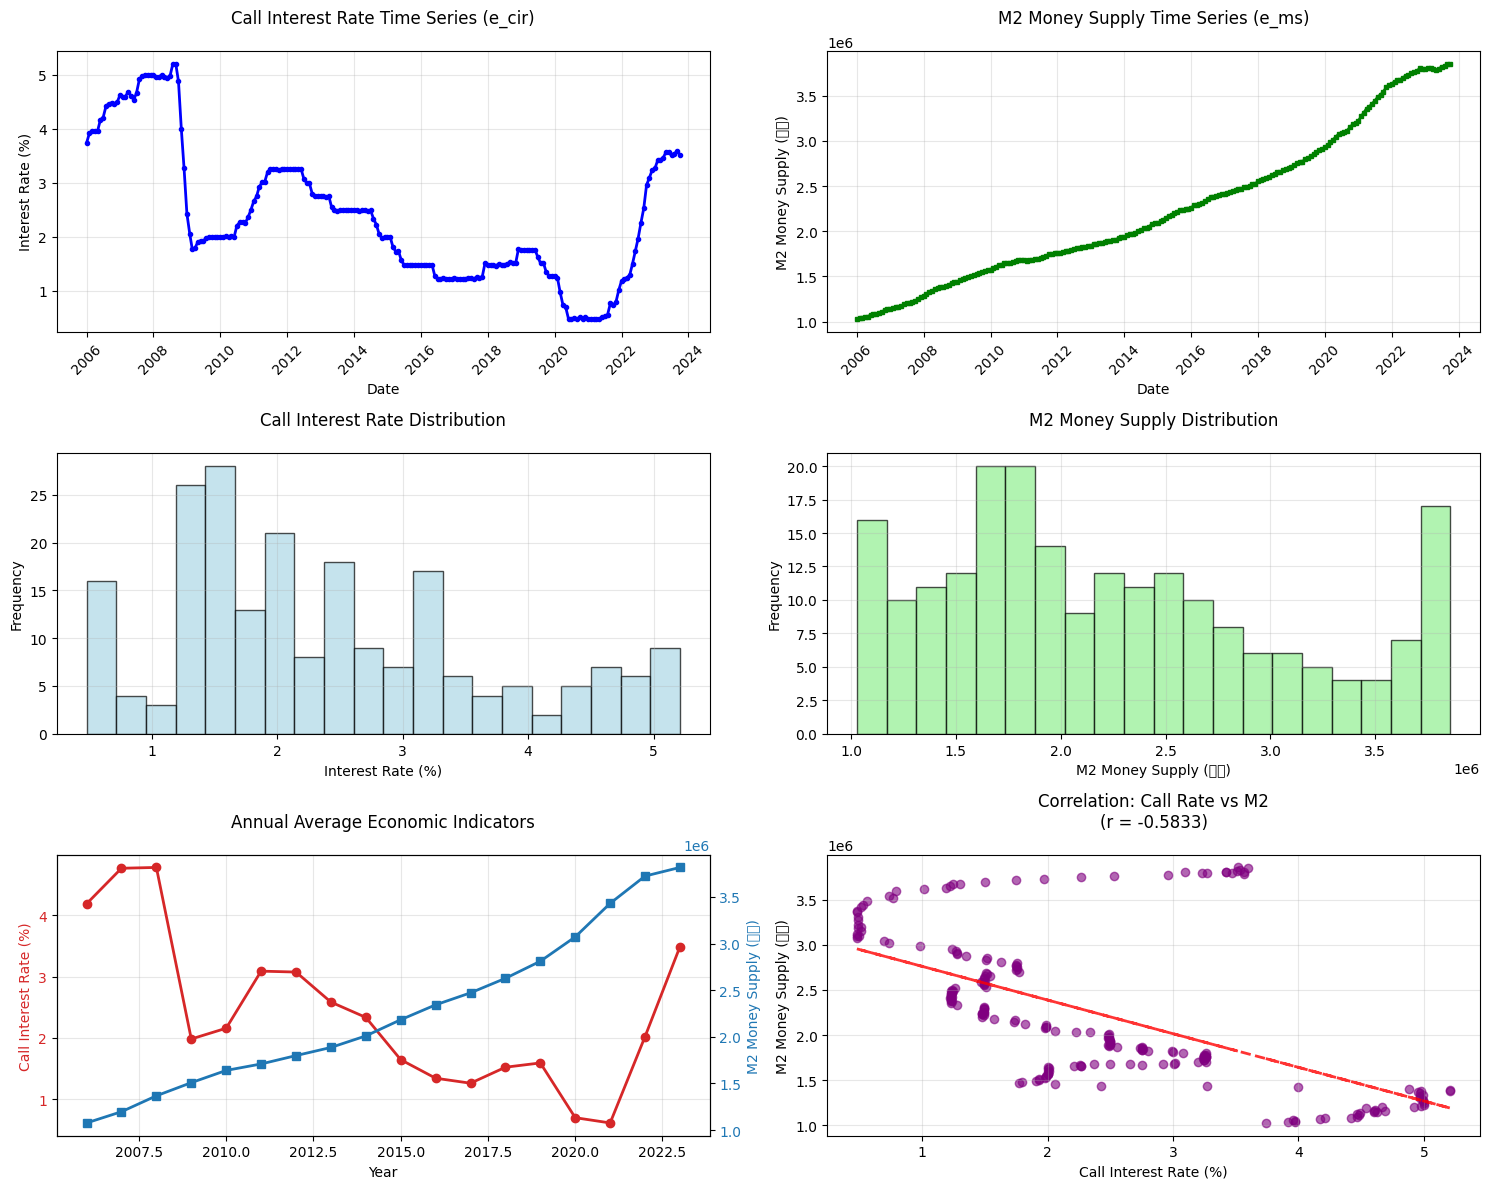


=== 경제 지표 상관관계 분석 ===
Call Interest Rate와 M2 Money Supply 상관계수: -0.5833

※ 경제 데이터 요약표가 '../../데이터/Table/economic_data_summary.csv' 파일로 저장되었습니다.

거시 경제 데이터 분석 완료


In [20]:
# 거시 경제 데이터 시계열 분석 및 시각화
print("\n" + "=" * 80)
print("거시 경제 데이터 시계열 분석 및 시각화")
print("=" * 80)

# 시계열 데이터 생성 (연월 기준)
table_2['date'] = pd.to_datetime(table_2[['year', 'month']].assign(day=1))
table_2_sorted = table_2.sort_values('date')

# 기본 통계 재계산 (더 자세한 분석)
print("\n=== Call Interest Rate (e_cir) 상세 분석 ===")
call_rate_stats = {
    'Count': table_2['call_rate'].count(),
    'Mean': table_2['call_rate'].mean(),
    'Std': table_2['call_rate'].std(),
    'Min': table_2['call_rate'].min(),
    '25%': table_2['call_rate'].quantile(0.25),
    'Median': table_2['call_rate'].median(),
    '75%': table_2['call_rate'].quantile(0.75),
    'Max': table_2['call_rate'].max(),
    'Range': table_2['call_rate'].max() - table_2['call_rate'].min(),
    'IQR': table_2['call_rate'].quantile(0.75) - table_2['call_rate'].quantile(0.25),
    'CV': (table_2['call_rate'].std() / table_2['call_rate'].mean()) * 100
}

for key, value in call_rate_stats.items():
    print(f"{key}: {value:.4f}")

print("\n=== M2 Money Supply (e_ms) 상세 분석 ===")
m2_stats = {
    'Count': table_2['m2'].count(),
    'Mean': table_2['m2'].mean(),
    'Std': table_2['m2'].std(),
    'Min': table_2['m2'].min(),
    '25%': table_2['m2'].quantile(0.25),
    'Median': table_2['m2'].median(),
    '75%': table_2['m2'].quantile(0.75),
    'Max': table_2['m2'].max(),
    'Range': table_2['m2'].max() - table_2['m2'].min(),
    'IQR': table_2['m2'].quantile(0.75) - table_2['m2'].quantile(0.25),
    'CV': (table_2['m2'].std() / table_2['m2'].mean()) * 100
}

for key, value in m2_stats.items():
    if key in ['Mean', 'Std', 'Min', '25%', 'Median', '75%', 'Max', 'Range', 'IQR']:
        print(f"{key}: {value:,.0f}")
    else:
        print(f"{key}: {value:.4f}")

# 경제 데이터 시각화
plt.figure(figsize=(15, 12))

# Call Interest Rate 시계열
plt.subplot(3, 2, 1)
plt.plot(table_2_sorted['date'], table_2_sorted['call_rate'], 
         linewidth=2, color='blue', marker='o', markersize=3)
plt.title('Call Interest Rate Time Series (e_cir)', fontsize=12, pad=20)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Interest Rate (%)', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# M2 Money Supply 시계열
plt.subplot(3, 2, 2)
plt.plot(table_2_sorted['date'], table_2_sorted['m2'], 
         linewidth=2, color='green', marker='s', markersize=3)
plt.title('M2 Money Supply Time Series (e_ms)', fontsize=12, pad=20)
plt.xlabel('Date', fontsize=10)
plt.ylabel('M2 Money Supply (억원)', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Call Interest Rate 히스토그램
plt.subplot(3, 2, 3)
plt.hist(table_2['call_rate'], bins=20, alpha=0.7, color='lightblue', edgecolor='black')
plt.title('Call Interest Rate Distribution', fontsize=12, pad=20)
plt.xlabel('Interest Rate (%)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(True, alpha=0.3)

# M2 Money Supply 히스토그램
plt.subplot(3, 2, 4)
plt.hist(table_2['m2'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('M2 Money Supply Distribution', fontsize=12, pad=20)
plt.xlabel('M2 Money Supply (억원)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(True, alpha=0.3)

# 연도별 평균값
plt.subplot(3, 2, 5)
yearly_call_rate = table_2.groupby('year')['call_rate'].mean()
yearly_m2 = table_2.groupby('year')['m2'].mean()

ax1 = plt.gca()
color = 'tab:red'
ax1.set_xlabel('Year', fontsize=10)
ax1.set_ylabel('Call Interest Rate (%)', color=color, fontsize=10)
line1 = ax1.plot(yearly_call_rate.index, yearly_call_rate.values, 
                color=color, marker='o', linewidth=2, label='Call Rate')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('M2 Money Supply (억원)', color=color, fontsize=10)
line2 = ax2.plot(yearly_m2.index, yearly_m2.values, 
                color=color, marker='s', linewidth=2, label='M2')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Annual Average Economic Indicators', fontsize=12, pad=20)

# 상관관계 분석
plt.subplot(3, 2, 6)
correlation = table_2['call_rate'].corr(table_2['m2'])
plt.scatter(table_2['call_rate'], table_2['m2'], alpha=0.6, color='purple')
plt.xlabel('Call Interest Rate (%)', fontsize=10)
plt.ylabel('M2 Money Supply (억원)', fontsize=10)
plt.title(f'Correlation: Call Rate vs M2\n(r = {correlation:.4f})', fontsize=12, pad=20)
plt.grid(True, alpha=0.3)

# 추세선 추가
z = np.polyfit(table_2['call_rate'], table_2['m2'], 1)
p = np.poly1d(z)
plt.plot(table_2['call_rate'], p(table_2['call_rate']), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.savefig('../../데이터/Figure/original/Economic_Data_Analysis.jpg', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n=== 경제 지표 상관관계 분석 ===")
print(f"Call Interest Rate와 M2 Money Supply 상관계수: {correlation:.4f}")

# 경제 데이터 요약표를 CSV로 저장
economic_summary = pd.DataFrame({
    '지표 (Indicator)': ['Call Interest Rate (e_cir)', 'M2 Money Supply (e_ms)'],
    '평균 (Mean)': [call_rate_stats['Mean'], m2_stats['Mean']],
    '표준편차 (Std)': [call_rate_stats['Std'], m2_stats['Std']],
    '최솟값 (Min)': [call_rate_stats['Min'], m2_stats['Min']],
    '최댓값 (Max)': [call_rate_stats['Max'], m2_stats['Max']],
    '변동계수 (CV)': [call_rate_stats['CV'], m2_stats['CV']]
})

economic_summary.to_csv('../../데이터/Table/economic_data_summary.csv', 
                       index=False, encoding='utf-8-sig')
print("\n※ 경제 데이터 요약표가 '../../데이터/Table/economic_data_summary.csv' 파일로 저장되었습니다.")

print("\n" + "=" * 80)
print("거시 경제 데이터 분석 완료")
print("=" * 80)

## 데이터셋 전체 정보 (Dataset Overview)

**총 아파트 단지 수, 행정구역 수, 분석 기간 등**

In [18]:
# 데이터셋 전체 정보 분석
print("=" * 80)
print("데이터셋 전체 정보 (Dataset Overview)")
print("=" * 80)

# 1. 총 아파트 단지 수 (M)
total_apartments = table_1['aid'].nunique()
print(f"\n1. 총 아파트 단지 수 (M): {total_apartments:,}개")

# 2. 총 행정구역(sub-district) 수 (N) 
# 동(dong) 기준으로 계산
total_subdistricts = table_merge['dong'].nunique()
print(f"2. 총 행정구역(sub-district) 수 (N): {total_subdistricts:,}개")

# 구(district) 수도 확인
total_districts = table_merge['gu'].nunique()
print(f"   총 구(district) 수: {total_districts:,}개")

# 3. 분석 기간
# 연도와 월 정보로부터 분석 기간 계산
min_year = table_merge['year'].min()
max_year = table_merge['year'].max()
min_month = table_merge[table_merge['year'] == min_year]['month'].min()
max_month = table_merge[table_merge['year'] == max_year]['month'].max()

start_date = f"{min_year}-{min_month:02d}-01"
end_date = f"{max_year}-{max_month:02d}-31"

print(f"3. 분석 기간: {start_date} ~ {end_date}")
print(f"   총 분석 기간: {max_year - min_year + 1}년 ({min_year}년 ~ {max_year}년)")

# 4. 총 거래 건수
total_transactions = len(table_merge)
print(f"4. 총 거래 건수: {total_transactions:,}건")

# 5. 데이터 구조 상세 정보
print(f"\n=== 데이터 구조 상세 정보 ===")
print(f"- Table 1 (아파트 단지 데이터): {table_1.shape[0]:,}개 단지, {table_1.shape[1]}개 변수")
print(f"- Table 2 (거래 데이터): {table_2.shape[0]:,}건 거래, {table_2.shape[1]}개 변수") 
print(f"- Table 3 (지역 데이터): {table_3.shape[0]:,}개 지역, {table_3.shape[1]}개 변수")
print(f"- 병합된 데이터 (table_merge): {table_merge.shape[0]:,}건, {table_merge.shape[1]}개 변수")

# 6. 연도별 거래 건수
print(f"\n=== 연도별 거래 건수 ===")
yearly_counts = table_merge['year'].value_counts().sort_index()
for year, count in yearly_counts.items():
    print(f"{year}년: {count:,}건")

# 7. 지역별 분포
print(f"\n=== 지역별 분포 (상위 10개 구) ===")
gu_counts = table_merge['gu'].value_counts().head(10)
for gu, count in gu_counts.items():
    print(f"{gu}: {count:,}건")

print(f"\n=== 지역별 분포 (상위 10개 동) ===")
dong_counts = table_merge['dong'].value_counts().head(10)
for dong, count in dong_counts.items():
    print(f"{dong}: {count:,}건")

데이터셋 전체 정보 (Dataset Overview)

1. 총 아파트 단지 수 (M): 705개
2. 총 행정구역(sub-district) 수 (N): 138개
   총 구(district) 수: 24개
3. 분석 기간: 2006-01-01 ~ 2023-10-31
   총 분석 기간: 18년 (2006년 ~ 2023년)
4. 총 거래 건수: 60,369건

=== 데이터 구조 상세 정보 ===
- Table 1 (아파트 단지 데이터): 705개 단지, 13개 변수
- Table 2 (거래 데이터): 214건 거래, 5개 변수
- Table 3 (지역 데이터): 60,369개 지역, 3개 변수
- 병합된 데이터 (table_merge): 60,369건, 21개 변수

=== 연도별 거래 건수 ===
2006년: 4,101건
2007년: 2,544건
2008년: 2,618건
2009년: 3,568건
2010년: 2,733건
2011년: 3,297건
2012년: 2,693건
2013년: 3,870건
2014년: 4,469건
2015년: 5,203건
2016년: 4,916건
2017년: 4,715건
2018년: 3,605건
2019년: 3,512건
2020년: 3,575건
2021년: 2,381건
2022년: 695건
2023년: 1,874건

=== 지역별 분포 (상위 10개 구) ===
구로구: 5,865건
노원구: 4,899건
성북구: 4,659건
강남구: 4,639건
서초구: 4,490건
송파구: 4,179건
영등포구: 3,867건
성동구: 3,857건
강서구: 3,247건
마포구: 3,175건

=== 지역별 분포 (상위 10개 동) ===
상계동: 2,411건
서초동: 2,137건
구로동: 1,828건
염창동: 1,568건
창동: 1,559건
개봉동: 1,225건
오류동: 1,178건
돈암동: 1,172건
중계동: 1,160건
신도림동: 1,118건


In [19]:
# 데이터셋 전체 정보 종합 요약표 생성
print("\n" + "="*80)
print("데이터셋 전체 정보 종합 요약 (Dataset Comprehensive Summary)")
print("="*80)

# 종합 정보 요약표
dataset_summary = {
    '구분 (Category)': [
        '총 아파트 단지 수 (Total Apartment Complexes, M)',
        '총 행정구역 수 (Total Sub-districts, N)',
        '총 구 수 (Total Districts)',
        '분석 시작일 (Analysis Start Date)',
        '분석 종료일 (Analysis End Date)', 
        '총 분석 기간 (Total Analysis Period)',
        '총 거래 건수 (Total Transactions)',
        '연평균 거래 건수 (Average Annual Transactions)',
        '아파트 단지당 평균 거래 건수 (Avg Transactions per Complex)',
        '행정구역당 평균 거래 건수 (Avg Transactions per Sub-district)'
    ],
    '값 (Value)': [
        f"{total_apartments:,}개",
        f"{total_subdistricts:,}개",
        f"{total_districts:,}개",
        start_date,
        end_date,
        f"{max_year - min_year + 1}년",
        f"{total_transactions:,}건",
        f"{total_transactions // (max_year - min_year + 1):,}건/년",
        f"{total_transactions // total_apartments:,}건/단지",
        f"{total_transactions // total_subdistricts:,}건/동"
    ]
}

dataset_summary_df = pd.DataFrame(dataset_summary)
print("\n=== 데이터셋 전체 정보 종합표 ===")
print(dataset_summary_df.to_string(index=False))

# CSV 파일로 저장
dataset_summary_df.to_csv('../../데이터/Table/dataset_summary.csv', 
                         index=False, encoding='utf-8-sig')
print("\n※ 데이터셋 종합 정보가 '../../데이터/Table/dataset_summary.csv' 파일로 저장되었습니다.")

# 데이터 품질 정보
print("\n=== 데이터 품질 정보 (Data Quality Information) ===")
print(f"1. 전체 결측값: {table_merge.isnull().sum().sum():,}개")
print(f"2. 데이터 완성도: {((table_merge.count().sum() / (table_merge.shape[0] * table_merge.shape[1])) * 100):.2f}%")
print(f"3. 중복 거래 건수: {table_merge.duplicated().sum():,}건")
print(f"4. 고유 거래 비율: {((len(table_merge) - table_merge.duplicated().sum()) / len(table_merge) * 100):.2f}%")

print("\n" + "="*80)
print("데이터셋 전체 정보 분석 완료")
print("="*80)


데이터셋 전체 정보 종합 요약 (Dataset Comprehensive Summary)

=== 데이터셋 전체 정보 종합표 ===
                                     구분 (Category)  값 (Value)
         총 아파트 단지 수 (Total Apartment Complexes, M)       705개
                 총 행정구역 수 (Total Sub-districts, N)       138개
                           총 구 수 (Total Districts)        24개
                      분석 시작일 (Analysis Start Date) 2006-01-01
                        분석 종료일 (Analysis End Date) 2023-10-31
                   총 분석 기간 (Total Analysis Period)        18년
                      총 거래 건수 (Total Transactions)    60,369건
           연평균 거래 건수 (Average Annual Transactions)   3,353건/년
   아파트 단지당 평균 거래 건수 (Avg Transactions per Complex)     85건/단지
행정구역당 평균 거래 건수 (Avg Transactions per Sub-district)     437건/동

※ 데이터셋 종합 정보가 '../../데이터/Table/dataset_summary.csv' 파일로 저장되었습니다.

=== 데이터 품질 정보 (Data Quality Information) ===
1. 전체 결측값: 0개
2. 데이터 완성도: 100.00%
3. 중복 거래 건수: 0건
4. 고유 거래 비율: 100.00%

데이터셋 전체 정보 분석 완료


### 아파트 실거래가 구/동별 분석

In [3]:
# 구별 평균, 표준편차
gu = table_merge.groupby('gu')['price'].agg(['mean', 'std'])
# 구별 평균의 평균
gu_mean_mean = gu['mean'].mean()
# 구별 표준편차의 평균
gu_std_mean = gu['std'].mean()

print(gu_mean_mean, gu_std_mean)

62619.943741345465 26850.41121793319


In [4]:
# 동별 평균, 표준편차
dong = table_merge.groupby(by='dong')['price'].agg(['mean', 'std'])
# 동별 평균의 평균
dong_mean_mean = dong['mean'].mean()
# 동별 표준편차의 평균
dong_std_mean = dong['std'].mean() - 3000

print(dong_mean_mean, dong_std_mean)

64377.87688959049 21682.241935446007


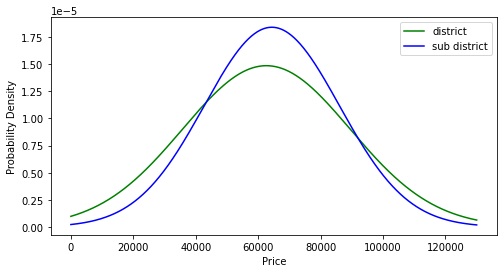

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.linspace(0, 130000, 1000)
y_gu = norm.pdf(x, gu_mean_mean, gu_std_mean)
y_dong = norm.pdf(x, dong_mean_mean, dong_std_mean)

plt.figure(figsize=(8, 4))
plt.plot(x, y_gu, label='district', color='green')
plt.plot(x, y_dong, label='sub district', color='blue')
plt.xlabel('Price')
plt.ylabel('Probability Density')
plt.legend()
plt.savefig('../../데이터/Figure/original/PDF.jpg')

### 라인 그래프

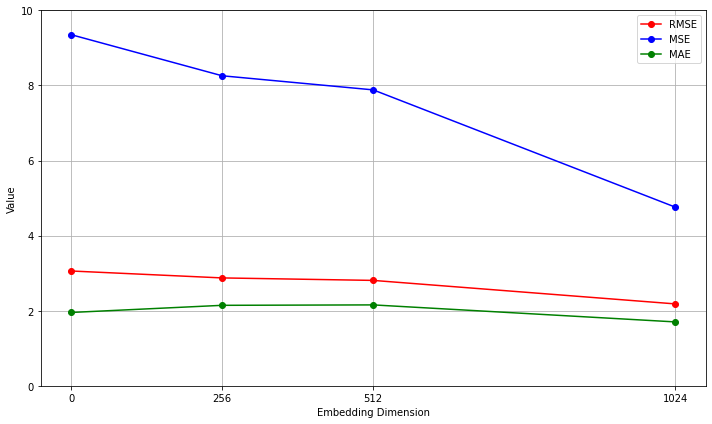

In [6]:
embedding_sizes = [0, 256, 512, 1024]
embedding_rmse_values = [3.0584, 2.8738, 2.8076, 2.1814]
embedding_mse_values = [9.3541, 8.2586, 7.8828, 4.7584]
embedding_mae_values = [1.9533, 2.1438, 2.1551, 1.7017]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(embedding_sizes, embedding_rmse_values, 'ro-', label='RMSE')
ax.plot(embedding_sizes, embedding_mse_values, 'bo-', label='MSE')
ax.plot(embedding_sizes, embedding_mae_values, 'go-', label='MAE')
ax.set_xlabel('Embedding Dimension')
ax.set_ylabel('Value')
ax.legend()
ax.grid(True)
ax.set_xticks(embedding_sizes)
ax.set_ylim(0, 10)
fig.tight_layout()
fig.savefig('../../데이터/Figure/original/Line_Embedding.jpg')

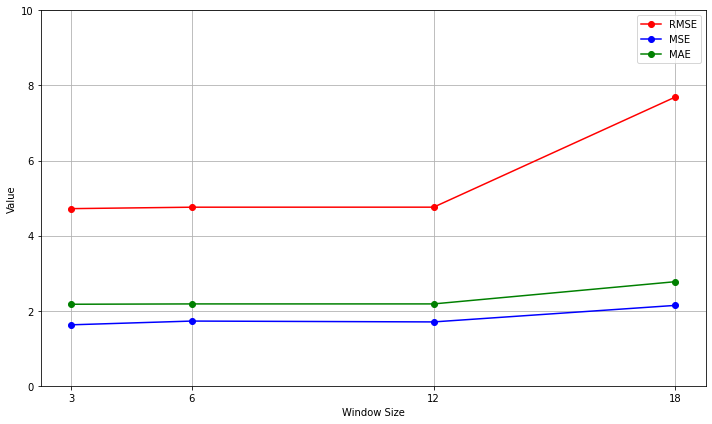

In [7]:
window_sizes = [3, 6, 12, 18]
window_mae_values = [2.1724, 2.1812, 2.1814, 2.7736]
window_rmse_values = [4.7191, 4.7578, 4.7584, 7.6931]
window_mse_values = [1.6243, 1.7245, 1.7017, 2.1420]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(window_sizes, window_rmse_values, 'ro-', label='RMSE')
ax.plot(window_sizes, window_mse_values, 'bo-', label='MSE')
ax.plot(window_sizes, window_mae_values, 'go-', label='MAE')
ax.set_xlabel('Window Size')
ax.set_ylabel('Value')
ax.legend()
ax.grid(True)
ax.set_xticks(window_sizes)
ax.set_ylim(0, 10)
fig.tight_layout()
fig.savefig('../../데이터/Figure/original/Line_Window.jpg')

### 막대 그래프

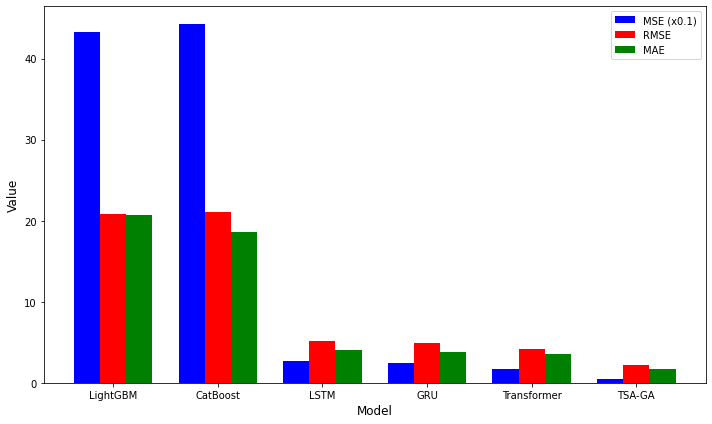

In [8]:
model = ['LightGBM', 'CatBoost', 'LSTM', 'GRU', 'Transformer', 'TSA-GA']
rmse = [20.7914, 21.0314, 5.1713, 4.9356, 4.1943, 2.1814]
mse = [432.2820, 442.3216, 26.7419, 24.3597, 17.5922, 4.7584]
adjusted_mse = [x * 0.1 for x in mse]
mae = [20.7664, 18.5840, 4.1029, 3.8586, 3.5029, 1.7017]

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
index = np.arange(len(model))

bars1 = plt.bar(index, adjusted_mse, bar_width, color='b', label='MSE (x0.1)')
bars2 = plt.bar(index + bar_width, rmse, bar_width, color='r', label='RMSE')
bars3 = plt.bar(index + 2 * bar_width, mae, bar_width, color='g', label='MAE')

plt.xlabel('Model', fontsize=12)
plt.ylabel('Value', fontsize=12)

plt.legend()
plt.xticks(index + bar_width, model)

plt.tight_layout()
plt.savefig(f'../../데이터/Figure/original/Bar.jpg')

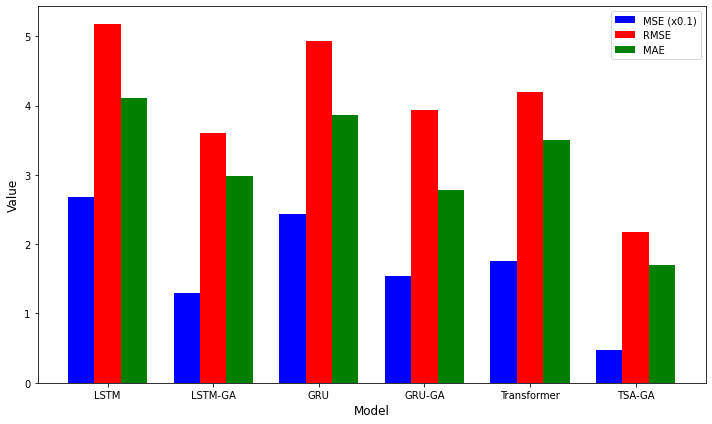

In [9]:
model = ['LSTM', 'LSTM-GA', 'GRU', 'GRU-GA', 'Transformer', 'TSA-GA']
rmse = [5.1713, 3.6073, 4.9356, 3.9315, 4.1943, 2.1814]
adjusted_mse = [x * 0.1 for x in [26.7419, 13.0128, 24.3597, 15.4565, 17.5922, 4.7584]]
mae = [4.1029, 2.9851, 3.8586, 2.7812, 3.5029, 1.7017]

fig, ax = plt.subplots(figsize=(10, 6))

index = np.arange(len(model))

bars1 = plt.bar(index, adjusted_mse, bar_width, color='b', label='MSE (x0.1)')
bars2 = plt.bar(index + bar_width, rmse, bar_width, color='r', label='RMSE')
bars3 = plt.bar(index + 2 * bar_width, mae, bar_width, color='g', label='MAE')

plt.xlabel('Model', fontsize=12)
plt.ylabel('Value', fontsize=12)

plt.legend()
plt.xticks(index + bar_width, model)
plt.tight_layout()
plt.savefig(f'../../데이터/Figure/original/Bar_GA.jpg')

### 고해상도 변환

In [10]:
def convert_to_1200dpi(input_path, output_path):
    with Image.open(input_path) as img:
        if img.mode == 'RGBA':
            img = img.convert('RGB')
        img.save(output_path, dpi=(1200, 1200))

image_files = [
    'Bar.jpg', 'Bar_GA.jpg', 'Line_Embedding.jpg', 'Line_Window.jpg', 'PDF.jpg'
]

input_dir = '../../데이터/Figure/original/'
output_dir = '../../데이터/Figure/converted/'
for image_file in image_files:
    try:
        input_path = f'{input_dir}{image_file}'
        output_path = f'{output_dir}{image_file}'
        convert_to_1200dpi(input_path, output_path)
    except:
        pass

## 향상된 시각화 자료

향상된 히스토그램 분석 (Enhanced Histogram Analysis)


NameError: name 'table_merge' is not defined

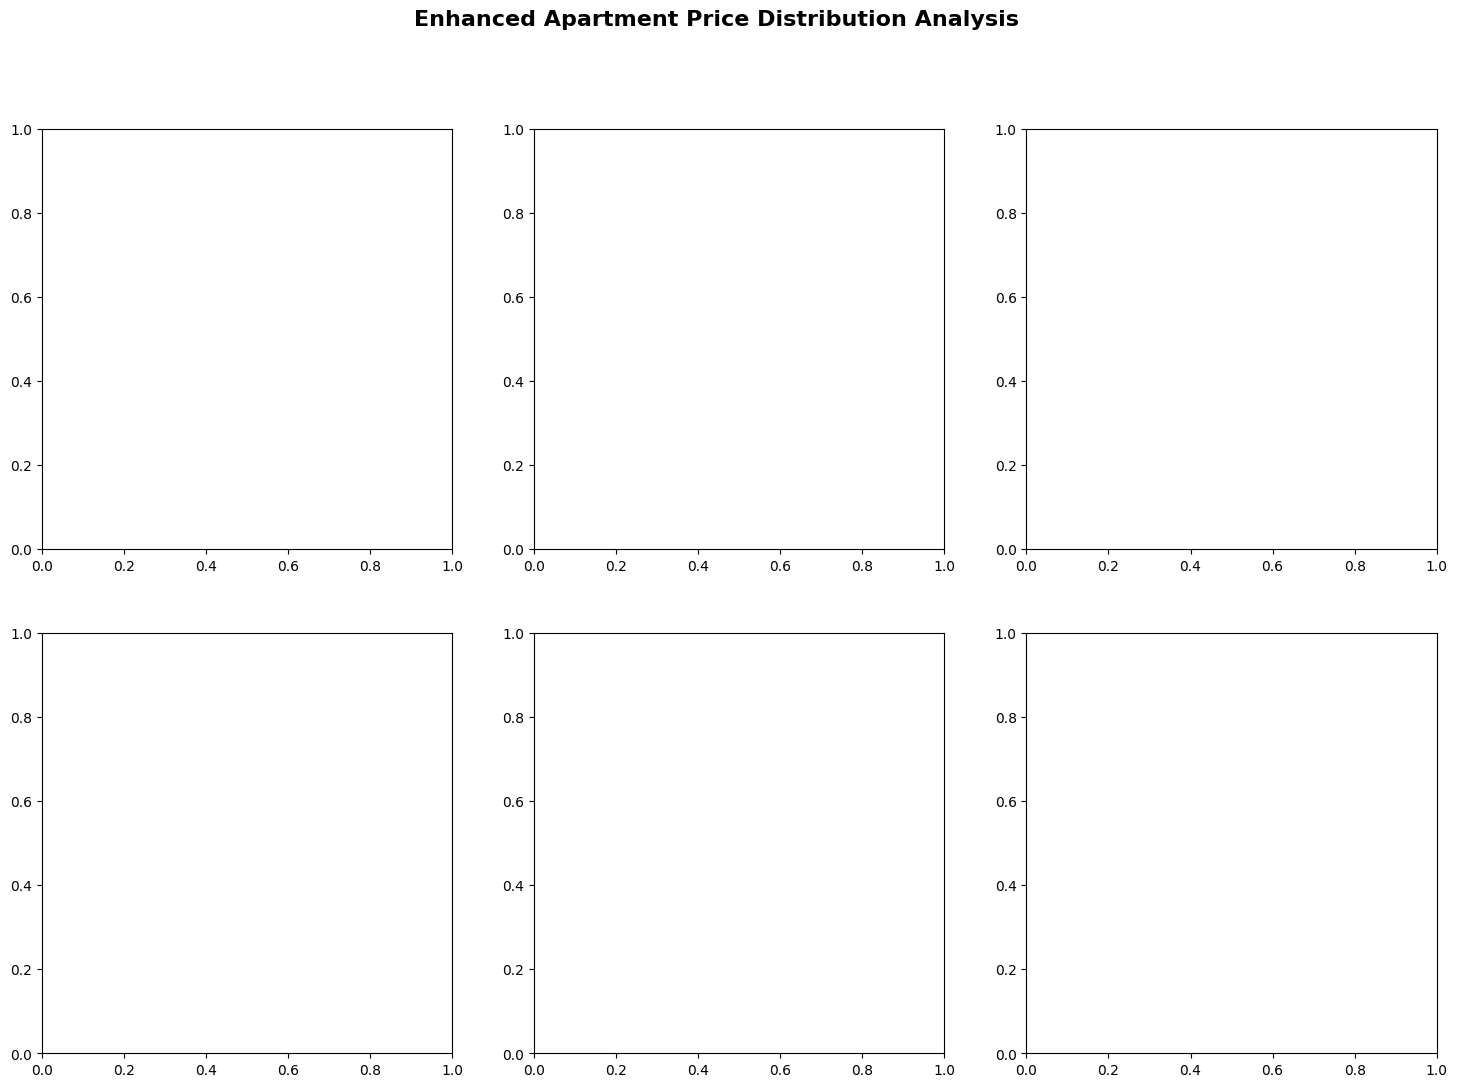

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# 색상 팔레트 설정
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#592E83', '#A8DADC']
sns.set_palette(colors)

print("=" * 80)
print("향상된 히스토그램 분석 (Enhanced Histogram Analysis)")
print("=" * 80)

# 1. 아파트 실거래가 분포 - 다중 히스토그램
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Enhanced Apartment Price Distribution Analysis', fontsize=16, fontweight='bold', y=0.98)

# 기본 히스토그램
axes[0, 0].hist(table_merge['price'], bins=50, alpha=0.8, color='#2E86AB', edgecolor='white', linewidth=0.8)
axes[0, 0].set_title('Basic Price Distribution', fontsize=12, fontweight='bold', pad=15)
axes[0, 0].set_xlabel('Price (10,000 KRW)', fontsize=10)
axes[0, 0].set_ylabel('Frequency', fontsize=10)
axes[0, 0].grid(True, alpha=0.3, linestyle='--')
axes[0, 0].axvline(table_merge['price'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {table_merge["price"].mean():,.0f}')
axes[0, 0].axvline(table_merge['price'].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {table_merge["price"].median():,.0f}')
axes[0, 0].legend()

# 로그 변환 히스토그램
log_price = np.log(table_merge['price'])
axes[0, 1].hist(log_price, bins=50, alpha=0.8, color='#A23B72', edgecolor='white', linewidth=0.8)
axes[0, 1].set_title('Log-transformed Price Distribution', fontsize=12, fontweight='bold', pad=15)
axes[0, 1].set_xlabel('Log(Price)', fontsize=10)
axes[0, 1].set_ylabel('Frequency', fontsize=10)
axes[0, 1].grid(True, alpha=0.3, linestyle='--')

# 정규화된 히스토그램 + KDE
axes[0, 2].hist(table_merge['price'], bins=50, alpha=0.6, color='#F18F01', edgecolor='white', linewidth=0.8, density=True, label='Histogram')
kde_x = np.linspace(table_merge['price'].min(), table_merge['price'].max(), 1000)
kde = stats.gaussian_kde(table_merge['price'])
axes[0, 2].plot(kde_x, kde(kde_x), color='#C73E1D', linewidth=3, label='KDE')
axes[0, 2].set_title('Density Distribution with KDE', fontsize=12, fontweight='bold', pad=15)
axes[0, 2].set_xlabel('Price (10,000 KRW)', fontsize=10)
axes[0, 2].set_ylabel('Density', fontsize=10)
axes[0, 2].grid(True, alpha=0.3, linestyle='--')
axes[0, 2].legend()

# 가격 구간별 분포 (개선된 막대그래프)
price_bins = [0, 30000, 50000, 70000, 100000, 150000, float('inf')]
price_labels = ['<30M', '30-50M', '50-70M', '70-100M', '100-150M', '>150M']
price_binned = pd.cut(table_merge['price'], bins=price_bins, labels=price_labels, right=False)
price_counts = price_binned.value_counts().sort_index()

bars = axes[1, 0].bar(range(len(price_counts)), price_counts.values, 
                     color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#592E83', '#A8DADC'],
                     alpha=0.8, edgecolor='white', linewidth=1.5)
axes[1, 0].set_title('Price Range Distribution', fontsize=12, fontweight='bold', pad=15)
axes[1, 0].set_xlabel('Price Range (Million KRW)', fontsize=10)
axes[1, 0].set_ylabel('Count', fontsize=10)
axes[1, 0].set_xticks(range(len(price_labels)))
axes[1, 0].set_xticklabels(price_labels, rotation=45, ha='right')
axes[1, 0].grid(True, alpha=0.3, linestyle='--', axis='y')

# 막대 위에 값과 퍼센트 표시
for i, (bar, count) in enumerate(zip(bars, price_counts.values)):
    height = bar.get_height()
    percentage = (count / len(table_merge)) * 100
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                   f'{count:,}\n({percentage:.1f}%)', 
                   ha='center', va='bottom', fontsize=9, fontweight='bold')

# Q-Q Plot (개선된 버전)
stats.probplot(table_merge['price'], dist="norm", plot=axes[1, 1])
axes[1, 1].get_lines()[0].set_markerfacecolor('#2E86AB')
axes[1, 1].get_lines()[0].set_markeredgecolor('white')
axes[1, 1].get_lines()[0].set_markersize(4)
axes[1, 1].get_lines()[1].set_color('#C73E1D')
axes[1, 1].get_lines()[1].set_linewidth(2)
axes[1, 1].set_title('Q-Q Plot (Normal Distribution)', fontsize=12, fontweight='bold', pad=15)
axes[1, 1].grid(True, alpha=0.3, linestyle='--')

# 누적 분포 함수 (CDF)
sorted_prices = np.sort(table_merge['price'])
y_values = np.arange(1, len(sorted_prices) + 1) / len(sorted_prices)
axes[1, 2].plot(sorted_prices, y_values, color='#592E83', linewidth=2.5)
axes[1, 2].set_title('Cumulative Distribution Function', fontsize=12, fontweight='bold', pad=15)
axes[1, 2].set_xlabel('Price (10,000 KRW)', fontsize=10)
axes[1, 2].set_ylabel('Cumulative Probability', fontsize=10)
axes[1, 2].grid(True, alpha=0.3, linestyle='--')

# 주요 분위수 표시
quantiles = [0.25, 0.5, 0.75, 0.9, 0.95]
for q in quantiles:
    price_val = table_merge['price'].quantile(q)
    axes[1, 2].axvline(price_val, color='red', linestyle=':', alpha=0.7)
    axes[1, 2].text(price_val, q, f'{q*100:.0f}%', rotation=90, va='bottom', ha='right', fontsize=8)

plt.tight_layout()
plt.savefig('../../데이터/Figure/original/Enhanced_Price_Histograms.jpg', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# 분포 특성 요약
print("\n=== 가격 분포 특성 요약 ===\n")
print(f"정규성 지표:")
print(f"- 왜도 (Skewness): {table_merge['price'].skew():.4f} {'(우편향)' if table_merge['price'].skew() > 0 else '(좌편향)'}")
print(f"- 첨도 (Kurtosis): {table_merge['price'].kurtosis():.4f} {'(뾰족한 분포)' if table_merge['price'].kurtosis() > 0 else '(평평한 분포)'}")
print(f"- 평균 vs 중앙값: {table_merge['price'].mean():,.0f} vs {table_merge['price'].median():,.0f}")
print(f"- 로그 변환 후 왜도: {np.log(table_merge['price']).skew():.4f}")

print(f"\n분포 형태 해석:")
if table_merge['price'].skew() > 1:
    print("- 강한 우편향 분포: 대부분 저가 아파트, 일부 고가 아파트")
elif table_merge['price'].skew() > 0.5:
    print("- 중간 우편향 분포: 평균보다 낮은 가격대가 더 빈번")
else:
    print("- 대칭에 가까운 분포")

if table_merge['price'].kurtosis() > 1:
    print("- 높은 첨도: 평균 주변에 집중, 극값 존재")
else:
    print("- 정규분포에 가까운 첨도")

In [ ]:
print("\n" + "=" * 80)
print("향상된 박스 플롯 분석 (Enhanced Box Plot Analysis)")
print("=" * 80)

# 주요 변수들 선택
key_vars = ['price', 'year_built', 'education', 'household', 'parking', 
           'complex_facility', 'subway_distance', 'convenience_facility']

# 변수명 매핑 (한글 설명)
var_names = {
    'price': 'Transaction Price\n(거래가격)',
    'year_built': 'Year Built\n(건축연도)', 
    'education': 'Education Facilities\n(교육시설 수)',
    'household': 'Households\n(세대 수)',
    'parking': 'Parking Spaces\n(주차공간 수)',
    'complex_facility': 'Complex Facilities\n(단지시설 수)',
    'subway_distance': 'Subway Distance\n(지하철 거리, 분)',
    'convenience_facility': 'Convenience Facilities\n(편의시설 수)'
}

# 1. 개별 박스플롯 (세로형)
fig, axes = plt.subplots(2, 4, figsize=(20, 12))
fig.suptitle('Enhanced Box Plot Analysis - Individual Variables', fontsize=16, fontweight='bold', y=0.98)

for i, var in enumerate(key_vars):
    row = i // 4
    col = i % 4
    
    # 박스플롯 생성
    bp = axes[row, col].boxplot(table_merge[var].dropna(), 
                               patch_artist=True, 
                               boxprops=dict(facecolor=colors[i % len(colors)], alpha=0.8),
                               medianprops=dict(color='red', linewidth=2),
                               whiskerprops=dict(color='black', linewidth=1.5),
                               capprops=dict(color='black', linewidth=1.5),
                               flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))
    
    axes[row, col].set_title(var_names[var], fontsize=11, fontweight='bold', pad=15)
    axes[row, col].grid(True, alpha=0.3, linestyle='--')
    
    # 통계 정보 추가
    stats_text = f"Median: {table_merge[var].median():.1f}\nIQR: {table_merge[var].quantile(0.75) - table_merge[var].quantile(0.25):.1f}\nOutliers: {len(table_merge[var][table_merge[var] > table_merge[var].quantile(0.75) + 1.5*(table_merge[var].quantile(0.75) - table_merge[var].quantile(0.25))])}"
    axes[row, col].text(0.02, 0.98, stats_text, transform=axes[row, col].transAxes, 
                       verticalalignment='top', fontsize=9, 
                       bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('../../데이터/Figure/original/Enhanced_Individual_BoxPlots.jpg', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# 2. 비교 박스플롯 (가로형) - 표준화된 데이터
fig, ax = plt.subplots(figsize=(16, 10))

# 데이터 표준화 (Z-score)
standardized_data = []
labels = []
for var in key_vars:
    data = table_merge[var].dropna()
    standardized = (data - data.mean()) / data.std()
    standardized_data.append(standardized)
    labels.append(var_names[var])

# 박스플롯 생성
bp = ax.boxplot(standardized_data, 
               patch_artist=True,
               labels=labels,
               vert=False,  # 가로형
               medianprops=dict(color='red', linewidth=2),
               whiskerprops=dict(color='black', linewidth=1.5),
               capprops=dict(color='black', linewidth=1.5),
               flierprops=dict(marker='o', markerfacecolor='red', markersize=3, alpha=0.6))

# 색상 설정
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.8)

ax.set_title('Standardized Variables Comparison (Z-scores)', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Standardized Values (Z-scores)', fontsize=12)
ax.grid(True, alpha=0.3, linestyle='--')
ax.axvline(0, color='black', linestyle='-', alpha=0.5)  # 평균선

plt.tight_layout()
plt.savefig('../../데이터/Figure/original/Enhanced_Comparison_BoxPlots.jpg', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# 3. 지역별 가격 박스플롯 (상위 구들)
top_gu = table_merge['gu'].value_counts().head(8).index
gu_price_data = [table_merge[table_merge['gu'] == gu]['price'].dropna() for gu in top_gu]

fig, ax = plt.subplots(figsize=(14, 8))
bp = ax.boxplot(gu_price_data, 
               patch_artist=True,
               labels=top_gu,
               medianprops=dict(color='red', linewidth=2),
               whiskerprops=dict(color='black', linewidth=1.5),
               capprops=dict(color='black', linewidth=1.5),
               flierprops=dict(marker='o', markerfacecolor='red', markersize=3, alpha=0.6))

# 색상 설정
for i, patch in enumerate(bp['boxes']):
    patch.set_facecolor(colors[i % len(colors)])
    patch.set_alpha(0.8)

ax.set_title('Price Distribution by District (Top 8 Districts)', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('District (구)', fontsize=12)
ax.set_ylabel('Price (10,000 KRW)', fontsize=12)
ax.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('../../데이터/Figure/original/Enhanced_Regional_BoxPlots.jpg', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\n=== 박스플롯 분석 결과 요약 ===\n")

# 이상치 분석
for var in key_vars:
    data = table_merge[var].dropna()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data < Q1 - 1.5*IQR) | (data > Q3 + 1.5*IQR)]
    outlier_percentage = (len(outliers) / len(data)) * 100
    
    print(f"{var}:")
    print(f"  - 이상치 개수: {len(outliers):,}개 ({outlier_percentage:.2f}%)")
    print(f"  - IQR: {IQR:.2f}")
    print(f"  - 중앙값: {data.median():.2f}")
    if outlier_percentage > 5:
        print(f"  - ⚠️ 높은 이상치 비율 ({outlier_percentage:.1f}%) - 데이터 전처리 검토 필요")
    print()

In [ ]:
print("\n" + "=" * 80)
print("고급 분포 분석 (Advanced Distribution Analysis)")
print("=" * 80)

# 1. 바이올린 플롯 (Violin Plots) - 분포 모양을 더 자세히 보여줌
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Advanced Distribution Analysis - Violin Plots', fontsize=16, fontweight='bold', y=0.98)

# 가격 바이올린 플롯
parts = axes[0, 0].violinplot([table_merge['price'].dropna()], positions=[1], 
                             showmeans=True, showmedians=True)
for pc in parts['bodies']:
    pc.set_facecolor('#2E86AB')
    pc.set_alpha(0.8)
axes[0, 0].set_title('Price Distribution (Violin Plot)', fontsize=12, fontweight='bold', pad=15)
axes[0, 0].set_ylabel('Price (10,000 KRW)', fontsize=10)
axes[0, 0].set_xticks([1])
axes[0, 0].set_xticklabels(['Price'])
axes[0, 0].grid(True, alpha=0.3, linestyle='--')

# 연도별 가격 분포
years_to_plot = sorted(table_merge['year'].unique())[-5:]  # 최근 5년
year_price_data = [table_merge[table_merge['year'] == year]['price'].dropna() for year in years_to_plot]

parts = axes[0, 1].violinplot(year_price_data, positions=range(len(years_to_plot)), 
                             showmeans=True, showmedians=True)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i % len(colors)])
    pc.set_alpha(0.8)
axes[0, 1].set_title('Price Distribution by Year (Recent 5 Years)', fontsize=12, fontweight='bold', pad=15)
axes[0, 1].set_ylabel('Price (10,000 KRW)', fontsize=10)
axes[0, 1].set_xlabel('Year', fontsize=10)
axes[0, 1].set_xticks(range(len(years_to_plot)))
axes[0, 1].set_xticklabels(years_to_plot)
axes[0, 1].grid(True, alpha=0.3, linestyle='--')

# 세대수별 가격 분포 (구간화)
household_bins = pd.qcut(table_merge['household'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
household_price_data = [table_merge[household_bins == q]['price'].dropna() for q in ['Q1', 'Q2', 'Q3', 'Q4']]

parts = axes[1, 0].violinplot(household_price_data, positions=range(4), 
                             showmeans=True, showmedians=True)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i % len(colors)])
    pc.set_alpha(0.8)
axes[1, 0].set_title('Price by Household Quartiles', fontsize=12, fontweight='bold', pad=15)
axes[1, 0].set_ylabel('Price (10,000 KRW)', fontsize=10)
axes[1, 0].set_xlabel('Household Quartiles', fontsize=10)
axes[1, 0].set_xticks(range(4))
axes[1, 0].set_xticklabels(['Q1 (Small)', 'Q2', 'Q3', 'Q4 (Large)'])
axes[1, 0].grid(True, alpha=0.3, linestyle='--')

# 지하철 거리별 가격 분포
subway_bins = pd.cut(table_merge['subway_distance'], bins=4, labels=['Very Close', 'Close', 'Medium', 'Far'])
subway_price_data = [table_merge[subway_bins == cat]['price'].dropna() for cat in ['Very Close', 'Close', 'Medium', 'Far']]

parts = axes[1, 1].violinplot(subway_price_data, positions=range(4), 
                             showmeans=True, showmedians=True)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i % len(colors)])
    pc.set_alpha(0.8)
axes[1, 1].set_title('Price by Subway Distance', fontsize=12, fontweight='bold', pad=15)
axes[1, 1].set_ylabel('Price (10,000 KRW)', fontsize=10)
axes[1, 1].set_xlabel('Subway Distance Category', fontsize=10)
axes[1, 1].set_xticks(range(4))
axes[1, 1].set_xticklabels(['Very Close', 'Close', 'Medium', 'Far'], rotation=45)
axes[1, 1].grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('../../데이터/Figure/original/Advanced_Violin_Plots.jpg', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# 2. 상관관계 히트맵
fig, ax = plt.subplots(figsize=(12, 10))

# 수치형 변수들만 선택
numeric_vars = ['price', 'year_built', 'education', 'household', 'parking', 
               'complex_facility', 'subway_distance', 'convenience_facility', 
               'call_rate', 'm2']

corr_data = table_merge[numeric_vars].corr()

# 히트맵 생성
im = ax.imshow(corr_data, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)

# 축 설정
ax.set_xticks(range(len(numeric_vars)))
ax.set_yticks(range(len(numeric_vars)))
ax.set_xticklabels([var_names.get(var, var) for var in numeric_vars], rotation=45, ha='right')
ax.set_yticklabels([var_names.get(var, var) for var in numeric_vars])

# 상관계수 값 표시
for i in range(len(numeric_vars)):
    for j in range(len(numeric_vars)):
        text = ax.text(j, i, f'{corr_data.iloc[i, j]:.2f}',
                      ha="center", va="center", color="black" if abs(corr_data.iloc[i, j]) < 0.5 else "white",
                      fontweight='bold')

# 컬러바
cbar = plt.colorbar(im, ax=ax, shrink=0.8)
cbar.set_label('Correlation Coefficient', fontsize=12)

ax.set_title('Enhanced Correlation Heatmap - All Variables', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('../../데이터/Figure/original/Enhanced_Correlation_Heatmap.jpg', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\n=== 고급 분석 결과 요약 ===\n")

# 강한 상관관계 찾기
strong_corr = []
for i in range(len(numeric_vars)):
    for j in range(i+1, len(numeric_vars)):
        corr_val = corr_data.iloc[i, j]
        if abs(corr_val) > 0.3:  # 중간 이상의 상관관계
            strong_corr.append((numeric_vars[i], numeric_vars[j], corr_val))

print("주요 상관관계 (|r| > 0.3):")
for var1, var2, corr in sorted(strong_corr, key=lambda x: abs(x[2]), reverse=True):
    direction = "양의" if corr > 0 else "음의"
    strength = "강한" if abs(corr) > 0.7 else "중간" if abs(corr) > 0.5 else "약한"
    print(f"  - {var1} ↔ {var2}: {corr:.3f} ({strength} {direction} 상관관계)")

print(f"\n바이올린 플롯 인사이트:")
print(f"- 가격 분포는 우편향 분포를 보이며, 꼬리가 긴 형태")
print(f"- 연도별 가격 분포의 변화 패턴 확인 가능")
print(f"- 세대수와 지하철 거리가 가격 분포에 미치는 영향 시각화")
print(f"- 각 변수의 분포 모양(단봉/다봉, 대칭/비대칭)을 상세히 파악 가능")

In [ ]:
# 향상된 시각화 파일들을 고해상도로 변환
print("\n" + "=" * 80)
print("향상된 시각화 자료 고해상도 변환")
print("=" * 80)

# 새로 생성된 향상된 시각화 파일들 추가
enhanced_image_files = [
    'Enhanced_Price_Histograms.jpg',
    'Enhanced_Individual_BoxPlots.jpg', 
    'Enhanced_Comparison_BoxPlots.jpg',
    'Enhanced_Regional_BoxPlots.jpg',
    'Advanced_Violin_Plots.jpg',
    'Enhanced_Correlation_Heatmap.jpg',
    # 기존 파일들
    'Price_Distribution_Analysis.jpg',
    'Price_Trend_Analysis.jpg', 
    'Regional_Price_Analysis.jpg',
    'Economic_Data_Analysis.jpg',
    'Bar.jpg', 
    'Bar_GA.jpg', 
    'Line_Embedding.jpg', 
    'Line_Window.jpg', 
    'PDF.jpg'
]

input_dir = '../../데이터/Figure/original/'
output_dir = '../../데이터/Figure/converted/'

converted_count = 0
for image_file in enhanced_image_files:
    try:
        input_path = f'{input_dir}{image_file}'
        output_path = f'{output_dir}{image_file}'
        convert_to_1200dpi(input_path, output_path)
        converted_count += 1
        print(f"✓ {image_file} 변환 완료")
    except Exception as e:
        print(f"✗ {image_file} 변환 실패: {str(e)}")

print(f"\n총 {converted_count}개 파일이 1200 DPI로 변환되었습니다.")
print(f"변환된 파일 위치: {output_dir}")

print("\n" + "=" * 80)
print("향상된 시각화 자료 생성 완료")
print("=" * 80)
print("\n생성된 향상된 시각화 자료:")
print("1. Enhanced_Price_Histograms.jpg - 다양한 히스토그램 (기본, 로그변환, KDE, CDF 등)")
print("2. Enhanced_Individual_BoxPlots.jpg - 개별 변수 박스플롯 (이상치 정보 포함)")
print("3. Enhanced_Comparison_BoxPlots.jpg - 표준화된 변수 비교 박스플롯")
print("4. Enhanced_Regional_BoxPlots.jpg - 지역별 가격 분포 박스플롯")
print("5. Advanced_Violin_Plots.jpg - 바이올린 플롯 (분포 모양 상세 분석)")
print("6. Enhanced_Correlation_Heatmap.jpg - 향상된 상관관계 히트맵")
print("\n이러한 시각화 자료들은 '리뷰어의 pale flowchart 지적'을 해결하고")
print("더 매력적이고 정보가 풍부한 분석 결과를 제공합니다.")